## Import all Modules

In [1]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from sklearn.model_selection import train_test_split


Check if Cuda is available:

In [2]:
import torch

print(f'{torch.cuda.is_available() = }')
print(f'{torch.cuda.device_count() = }')

torch.cuda.is_available() = True
torch.cuda.device_count() = 2


In [3]:
!pip install ultralytics

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.3/41.3 kB 639.5 kB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 783.5/783.5 kB 5.5 MB/s eta 0:00:0000:0100:01


In [4]:
!pip install -U ipywidgets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139.4/139.4 kB 1.6 MB/s eta 0:00:00a 0:00:01m
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 214.4/214.4 kB 4.8 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.3/2.3 MB 24.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninst

## Setting up the dataset paths

In [5]:
dataset_path = '/kaggle/input/car-plate-detection'

In [6]:
import re

def the_number_in_the_string(filename):
    """
    Extracts the first sequence of digits from the given filename string and returns it as an integer.
    If no digits are found, returns 0.
    
    Parameters:
    filename(str): The input string to search for digits.
    
    Returns:
    int: The first sequence of digits found in the input string, or 0 if no digits are found.
    """
    # Search for the first occurance of one or more digits in the filename
    match = re.search(r'(\d+)', filename)
    
    # If a match is found, return the matched number as an integer
    if match:
        return int(match.group(0))
    # If no match is found, return 0
    else:
        return 0
    
# Example usage
print(the_number_in_the_string('file123.txt')) # Output: 123
print(the_number_in_the_string('no_numbers_here'))# Output: 0


123
0


## Formatting the XML File and creating DF

In [7]:
import os
import cv2
import pandas as pd
import xml.etree.ElementTree as xet
from glob import glob

# Initialize a dictionary to store labels and image information
labels_dict = dict(
    img_path = [],
    xmin = [],
    xmax = [],
    ymin = [],
    ymax = [],
    img_w = [],
    img_h = []
)

# Get the list of XML files from the annotations directory
xml_files = glob(f'{dataset_path}/annotations/*.xml')

# Process each XML file, sorted by thr numerical value in the filenames
for filename in sorted(xml_files, key = the_number_in_the_string):
    # Parse the XML file
    info = xet.parse(filename)
    root = info.getroot()
    
    # Find the 'object' element in the XML and extract bounding box information
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)
    
    # Get the image filname and construct the full path to the image
    img_name = root.find('filename').text
    img_path = os.path.join(dataset_path, 'images', img_name)
    
    # Append the extracted information to thr respective lists in the dictionary
    labels_dict['img_path'].append(img_path)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)
    
    # Read the image to get its dimensions
    height, width, _ = cv2.imread(img_path).shape
    labels_dict['img_w'].append(width)
    labels_dict['img_h'].append(height)
    
# Convert the dictionary to a pandas DataFrame
alldata = pd.DataFrame(labels_dict)

# Display the DataFrame
alldata

img_path  xmin  xmax  ymin  \
0    /kaggle/input/car-plate-detection/images/Cars0...   226   419   125   
1    /kaggle/input/car-plate-detection/images/Cars1...   134   262   128   
2    /kaggle/input/car-plate-detection/images/Cars2...   229   270   176   
3    /kaggle/input/car-plate-detection/images/Cars3...   142   261   128   
4    /kaggle/input/car-plate-detection/images/Cars4...   156   503    82   
..                                                 ...   ...   ...   ...   
428  /kaggle/input/car-plate-detection/images/Cars4...   142   258   128   
429  /kaggle/input/car-plate-detection/images/Cars4...    86   208   166   
430  /kaggle/input/car-plate-detection/images/Cars4...    38   116   159   
431  /kaggle/input/car-plate-detection/images/Cars4...    55   343    82   
432  /kaggle/input/car-plate-detection/images/Cars4...    95   196   258   

     ymax  img_w  img_h  
0     173    500    268  
1     160    400    248  
2     193    400    400  
3     157    400    225  
4     253    590    350  
..    ...    ...    ...  
428   157    400    225  
429   195    301    400  
430   197    400    225  
431   147    400    192  
432   284    467    300  

[433 rows x 7 columns]

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# Use 10% of the data for the test set
train, test = train_test_split(alldata, test_size = 1/10, random_state = 42)

# Split the training data further into training and validation sets
# Use 8/9 of the remaining data for the training set, resulting in 80/10/10 split overall
train, val = train_test_split(train, train_size = 8/9, random_state = 42)

# Print the number of samples in each set
print(f'''
    len(train) = {len(train)}
    len(val) = {len(val)}
    len(test) = {len(test)}
''')


    len(train) = 345
    len(val) = 44
    len(test) = 44



In [9]:
import os
import shutil
import pandas as pd

# Remove the 'datasets' directory if it exists
if os.path.exists('datasets'):
    shutil.rmtree('datasets')
    

In [10]:
train

img_path  xmin  xmax  ymin  \
124  /kaggle/input/car-plate-detection/images/Cars1...   305   320   256   
315  /kaggle/input/car-plate-detection/images/Cars3...    12   385    98   
282  /kaggle/input/car-plate-detection/images/Cars2...    37   319   145   
236  /kaggle/input/car-plate-detection/images/Cars2...   223   250   106   
112  /kaggle/input/car-plate-detection/images/Cars1...    49   164   135   
..                                                 ...   ...   ...   ...   
110  /kaggle/input/car-plate-detection/images/Cars1...   286   328   133   
255  /kaggle/input/car-plate-detection/images/Cars2...   116   273   156   
292  /kaggle/input/car-plate-detection/images/Cars2...    91   137   187   
54   /kaggle/input/car-plate-detection/images/Cars5...   148   257    61   
199  /kaggle/input/car-plate-detection/images/Cars1...    59   310    88   

     ymax  img_w  img_h  
124   267    400    267  
315   181    400    300  
282   203    350    263  
236   119    400    176  
112   191    240    400  
..    ...    ...    ...  
110   159    400    267  
255   188    400    267  
292   208    400    267  
54    118    400    300  
199   158    400    266  

[345 rows x 7 columns]

In [11]:
def make_split_folder_in_yolo_format(split_name, split_df):
    """
    Creates a folder structure for a dataset split (train/val/test) in YOLO format.
    
    Parameters:
    split_name (str): The name of the split (e.g., 'tarin', 'val', 'test').
    split_df (pd.DataFrame): The DataFrame containing the data foe the split.
    
    The function will create 'labels' and 'images' subdirectories under 'datasets/cars_license_plate/{split_name}',
    and save the corresponding labels and images in YOLO format.
    """
    labels_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'labels')
    images_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'images')
    
    # Create directories for labels and images
    os.makedirs(labels_path)
    os.makedirs(images_path)
    
    # Iterate over each row in the DataFrame
    for _, row in split_df.iterrows():
        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))
        
        # Calculate YOLO format bounding box coordinates
        x_center = (row['xmin'] + row['xmax']) / 2 / row['img_w']
        y_center = (row['ymin'] + row['ymax']) / 2 / row['img_h']
        width = (row['xmax'] - row['xmin']) / row['img_w']
        height = (row['ymax'] - row['ymin']) / row['img_h']
        
        # Save the label in YOLO format
        label_path = os.path.join(labels_path, f'{img_name}.txt')
        with open(label_path, 'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")
            
        # Copy the image to the images directory
        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))
        
    print(f"Created '{images_path}' and '{labels_path}'")

In [12]:
# Create YOLO format folders for train, validation, and test splits
make_split_folder_in_yolo_format('train', train)
make_split_folder_in_yolo_format('val', val)
make_split_folder_in_yolo_format('test', test)

Created 'datasets/cars_license_plate_new/train/images' and 'datasets/cars_license_plate_new/train/labels'
Created 'datasets/cars_license_plate_new/val/images' and 'datasets/cars_license_plate_new/val/labels'
Created 'datasets/cars_license_plate_new/test/images' and 'datasets/cars_license_plate_new/test/labels'


In [13]:
os.getcwd()

'/kaggle/working'

In [14]:
!pip install opencv-python

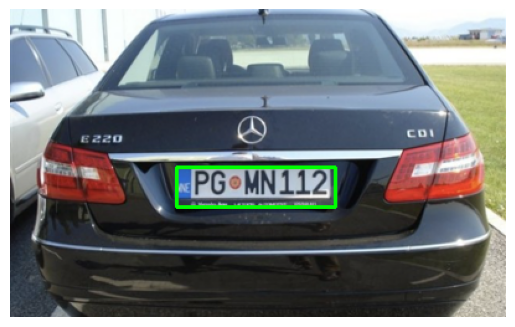

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory paths
image_dir = 'datasets/cars_license_plate_new/train/images'
label_dir = 'datasets/cars_license_plate_new/train/labels'

# Get the first image file
image_files = sorted(os.listdir(image_dir))
first_image_file = image_files[0]

# Construct paths for the image and its corresponding label
image_path = os.path.join(image_dir, first_image_file)
label_path = os.path.join(label_dir, os.path.splitext(first_image_file)[0] + '.txt')

# Load the image using OpenCV
image = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read the label file to get boundng box information
with open(label_path, 'r') as f:
    lines = f.readlines()
    
# Plot the bounding box on the image
for line in lines:
    # Parse the label file line to extract bounding box information
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    img_height, img_width, _ = image.shape
    
    # Convert YOLO format to bounding box format
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    
    # Calculate the top-left and bottom-right coordinates of the bounding box
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)
    
    # Draw the bounding box on the image using a green rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with bounding box using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()  # Display the image


Making .yaml File

In [16]:
# Define the content of the datasets.yaml file
datasets_yaml = '''
path: cars_license_plate_new 

train: train/images
val: val/images
test: test/images

# number of classes
nc: 1

# class names
names: ['license_plate']
'''

# Write the content to the datasets.yalm file
with open('datasets.yaml', 'w') as file:
    file.write(datasets_yaml)
    

In [17]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.23M/6.23M [00:00<00:00, 71.1MB/s]


In [18]:
model.train(
    data = 'datasets.yaml',  # Path to the dataset configuration file
    epochs = 130,            # Number of training epochs
    batch = 16,              # Batch size
    device = 'cuda',         # Use GPU for Training
    imgsz = 320,             # Image size (width and height) for training
    cache = True
)

Ultralytics YOLOv8.2.36 üöÄ Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets.yaml, epochs=130, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 14.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ‚úÖ


train: Scanning /kaggle/working/datasets/cars_license_plate_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 345/345 [00:00<00:00, 465.18it/s]

train: New cache created: /kaggle/working/datasets/cars_license_plate_new/train/labels.cache



train: Caching images (0.1GB RAM): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 345/345 [00:01<00:00, 185.91it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/cars_license_plate_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 44/44 [00:00<00:00, 475.03it/s]

val: New cache created: /kaggle/working/datasets/cars_license_plate_new/val/labels.cache



val: Caching images (0.0GB RAM): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 44/44 [00:00<00:00, 154.06it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ‚úÖ
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 130 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/130     0.908G      1.803      3.007       1.36         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:01<00:00,  1.22it/s]

                   all         44         44    0.00401      0.932      0.502      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/130     0.849G      1.489      1.512      1.141         22        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.73it/s]

                   all         44         44          1      0.115      0.307      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/130     0.858G      1.524       1.36      1.185         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.63it/s]

                   all         44         44      0.423      0.159      0.219     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/130     0.872G      1.469      1.272      1.202         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.62it/s]

                   all         44         44          1      0.129      0.294      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/130     0.872G      1.476       1.25      1.197         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  8.54it/s]

                   all         44         44      0.723      0.318      0.399      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/130     0.872G      1.449       1.14      1.183         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  8.39it/s]

                   all         44         44      0.655      0.455      0.554      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/130     0.864G      1.471      1.111       1.22         10        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.53it/s]

                   all         44         44      0.806      0.773      0.758      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/130     0.872G       1.42      1.025      1.172         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.21it/s]

                   all         44         44       0.83      0.774      0.795      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/130     0.866G      1.406      1.033      1.179         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.11it/s]


                   all         44         44      0.853      0.864      0.863      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/130     0.872G      1.367     0.9598      1.186         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.64it/s]

                   all         44         44      0.885      0.773      0.848      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/130     0.866G      1.395     0.9899      1.172         22        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.23it/s]

                   all         44         44      0.784      0.773      0.769      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/130     0.872G      1.393     0.9659      1.195         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.37it/s]

                   all         44         44      0.916      0.773      0.875      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/130     0.866G      1.377     0.9316      1.175         21        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.06it/s]

                   all         44         44      0.893      0.818      0.899      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/130     0.872G      1.303     0.8832      1.118         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.68it/s]

                   all         44         44      0.939      0.864      0.906      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/130     0.866G       1.28      0.866      1.106         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.28it/s]

                   all         44         44      0.889      0.795      0.864      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/130     0.872G       1.29     0.8623      1.099         20        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.07it/s]


                   all         44         44      0.898      0.802      0.848       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/130     0.866G      1.301     0.8289      1.108         20        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.94it/s]

                   all         44         44      0.862      0.849      0.884      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/130     0.872G      1.362     0.8856      1.136         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.63it/s]

                   all         44         44      0.924      0.841      0.846      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/130     0.866G      1.284     0.8366      1.107         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.00it/s]

                   all         44         44      0.949      0.841      0.876      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/130     0.872G      1.218     0.7932      1.113         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.13it/s]


                   all         44         44      0.922      0.864      0.924        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/130     0.864G       1.22     0.8149      1.096         20        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.76it/s]

                   all         44         44      0.854      0.841      0.871      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/130     0.872G      1.237     0.7758      1.082         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.65it/s]

                   all         44         44      0.904      0.857      0.872      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/130     0.866G      1.149       0.74      1.065         20        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.70it/s]

                   all         44         44       0.82      0.864      0.894      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/130     0.872G      1.193     0.7432      1.063         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.41it/s]

                   all         44         44      0.878      0.821      0.837      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/130     0.866G      1.147     0.7406      1.052         25        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.44it/s]

                   all         44         44      0.913      0.841      0.882      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/130     0.872G      1.191     0.7484      1.078         20        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.69it/s]

                   all         44         44      0.867      0.909      0.867      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/130     0.864G      1.182      0.755      1.052         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.26it/s]


                   all         44         44      0.919      0.841      0.914      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/130     0.872G      1.148     0.7461      1.056         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.96it/s]

                   all         44         44      0.881      0.886      0.881      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/130     0.866G      1.183     0.7406      1.081         23        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.39it/s]

                   all         44         44       0.81      0.886      0.853      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/130     0.872G      1.161     0.7582      1.044         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.33it/s]

                   all         44         44      0.845      0.795      0.834      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/130     0.864G      1.163     0.7244      1.072         13        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.52it/s]

                   all         44         44      0.868      0.818      0.827      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/130     0.872G       1.19      0.727      1.058         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.11it/s]


                   all         44         44      0.881      0.841      0.879      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/130     0.866G      1.111     0.6944      1.054         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.76it/s]

                   all         44         44      0.926      0.851      0.884      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/130     0.872G      1.118     0.6745      1.053         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.97it/s]


                   all         44         44      0.875      0.795      0.896      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/130     0.866G      1.086     0.6573      1.026         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.24it/s]


                   all         44         44      0.828      0.909      0.923      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/130     0.872G       1.13     0.6679      1.038         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.60it/s]

                   all         44         44      0.904      0.859      0.897      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/130     0.866G      1.121     0.6657      1.041         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.10it/s]


                   all         44         44      0.973      0.825      0.936      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/130     0.872G       1.07     0.6606      1.013         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.10it/s]


                   all         44         44      0.862      0.886      0.925      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/130     0.864G       1.12     0.6713      1.048         10        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.59it/s]

                   all         44         44      0.867      0.887      0.914      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/130     0.872G      1.031     0.6602      1.004         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.28it/s]


                   all         44         44      0.854      0.864      0.878      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/130     0.864G      1.086     0.6726      1.012         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.88it/s]

                   all         44         44       0.89      0.886       0.89      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/130     0.872G      1.041     0.6381     0.9946         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.44it/s]

                   all         44         44      0.936      0.841       0.88      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/130     0.866G       1.02     0.6297      1.016         13        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.52it/s]

                   all         44         44      0.884      0.841      0.886      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/130     0.872G      1.053     0.6458      1.014         11        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.50it/s]

                   all         44         44      0.921      0.818      0.904      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/130     0.866G      1.031     0.6036     0.9985         22        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.32it/s]

                   all         44         44      0.851      0.906      0.913       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/130     0.872G      1.017     0.6124     0.9941         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.57it/s]

                   all         44         44      0.974      0.839      0.936       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/130     0.866G      1.021     0.6394      1.005         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.48it/s]

                   all         44         44      0.921      0.864      0.926      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/130     0.872G      1.028     0.6146      1.006         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.92it/s]

                   all         44         44      0.918      0.841      0.928      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/130     0.866G      1.073     0.6348      1.022         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.32it/s]

                   all         44         44      0.794      0.877        0.9      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/130     0.872G       1.02     0.6051      1.007         24        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.66it/s]

                   all         44         44      0.829      0.886      0.901      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/130     0.864G      1.013     0.6181      0.986         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.59it/s]

                   all         44         44      0.883      0.864       0.89      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/130     0.872G     0.9659     0.5898     0.9823         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.08it/s]


                   all         44         44      0.868      0.909      0.922      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/130     0.866G     0.9705      0.574     0.9778         11        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.64it/s]

                   all         44         44       0.84      0.886      0.908      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/130      0.87G     0.9976     0.5965     0.9629         13        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.63it/s]

                   all         44         44      0.937      0.864        0.9      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/130     0.864G      1.017     0.6134     0.9994         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.73it/s]

                   all         44         44      0.937      0.795      0.872      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/130     0.872G     0.9795      0.587     0.9888         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.74it/s]

                   all         44         44      0.832      0.903      0.899      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/130     0.866G     0.9796     0.6025          1         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.95it/s]

                   all         44         44      0.877      0.909      0.928      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/130     0.872G     0.9286     0.5756      0.983         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.64it/s]

                   all         44         44      0.792      0.864      0.898      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/130     0.866G     0.9869     0.5828     0.9786         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.01it/s]

                   all         44         44      0.924      0.828      0.902      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/130     0.872G     0.9375     0.5733     0.9811         20        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.45it/s]

                   all         44         44      0.881      0.909      0.915      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/130     0.866G      0.935     0.5711     0.9838         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.69it/s]

                   all         44         44      0.893      0.886      0.912      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/130      0.87G     0.9156     0.5523     0.9669         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.46it/s]

                   all         44         44      0.913      0.909      0.903      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/130     0.866G     0.9448      0.566     0.9717         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.36it/s]

                   all         44         44      0.915      0.864      0.895      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/130     0.872G     0.9143     0.5685     0.9771         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.71it/s]

                   all         44         44      0.885      0.877      0.889      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/130     0.864G     0.9537     0.5772     0.9796         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.14it/s]


                   all         44         44      0.869      0.905      0.894      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/130     0.872G     0.9521     0.5689     0.9951         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.73it/s]

                   all         44         44      0.829      0.864      0.903      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/130     0.866G      0.908     0.5391     0.9623         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.73it/s]

                   all         44         44      0.847      0.882      0.892      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/130     0.872G     0.8854      0.548     0.9722         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.42it/s]

                   all         44         44       0.85        0.9        0.9      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/130     0.866G     0.9106     0.5397     0.9618         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.96it/s]

                   all         44         44      0.949      0.795      0.909      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/130     0.872G     0.9325     0.5506     0.9812         21        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.88it/s]

                   all         44         44      0.823      0.955      0.937      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/130     0.866G     0.8879     0.5324     0.9472         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.70it/s]

                   all         44         44       0.88      0.886      0.905      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/130     0.872G     0.9181     0.5423     0.9736         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.65it/s]

                   all         44         44      0.886      0.885      0.907      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/130     0.866G     0.8952     0.5452      0.967         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.54it/s]

                   all         44         44      0.881      0.886      0.903      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/130     0.872G     0.9177      0.549     0.9527         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  8.85it/s]

                   all         44         44      0.856      0.955      0.946      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/130     0.866G     0.8687     0.5144     0.9401         13        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.06it/s]

                   all         44         44      0.862      0.886       0.92      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/130     0.872G     0.8549     0.5228     0.9442         21        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.12it/s]


                   all         44         44      0.885      0.909      0.938      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/130     0.866G     0.8472     0.5031     0.9371         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.79it/s]

                   all         44         44      0.871      0.955      0.954      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/130     0.872G     0.8511     0.5081     0.9461         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.97it/s]

                   all         44         44       0.87      0.932      0.933      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/130     0.866G     0.8476     0.5111      0.956         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.88it/s]

                   all         44         44       0.82       0.93      0.916      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/130     0.872G     0.8262     0.5056      0.916         21        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.68it/s]

                   all         44         44      0.886      0.885       0.91      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/130     0.866G     0.8414      0.513     0.9495         22        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.65it/s]

                   all         44         44      0.884      0.864      0.916      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/130     0.872G      0.875     0.5163      0.949         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.41it/s]

                   all         44         44      0.886      0.909      0.922      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/130     0.864G     0.8301     0.5068     0.9359         22        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.08it/s]


                   all         44         44      0.883      0.886      0.912      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/130     0.872G     0.8247     0.4953     0.9213         24        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.62it/s]

                   all         44         44      0.879      0.886       0.91      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/130     0.866G     0.8339     0.4808     0.9415         23        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.33it/s]


                   all         44         44      0.865      0.878       0.91      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/130     0.872G     0.8171     0.4834     0.9443         24        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.95it/s]


                   all         44         44      0.862      0.864      0.893      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/130     0.864G      0.813      0.485     0.9364         13        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.78it/s]

                   all         44         44      0.879      0.864      0.922      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/130     0.872G     0.8167     0.4819      0.937         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.63it/s]

                   all         44         44      0.879      0.829      0.875      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/130     0.866G     0.8528     0.5025     0.9317         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.17it/s]


                   all         44         44      0.879      0.886      0.902      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/130      0.87G     0.7928     0.4617     0.9318         10        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.34it/s]


                   all         44         44      0.901      0.886      0.916      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/130     0.866G     0.8029     0.4915     0.9335         20        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.31it/s]

                   all         44         44      0.898      0.909       0.93      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/130     0.872G     0.7883     0.4663     0.9369         24        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.72it/s]

                   all         44         44      0.863      0.864      0.892      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/130     0.866G     0.8264     0.4831     0.9566         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.10it/s]

                   all         44         44      0.859      0.886      0.885      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/130      0.87G     0.7864     0.4768     0.9199         12        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.76it/s]

                   all         44         44      0.848      0.886      0.889      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/130     0.864G     0.7906     0.4705     0.9278         13        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.45it/s]

                   all         44         44      0.866      0.886      0.899      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/130     0.872G     0.7666     0.4738     0.9362         22        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.94it/s]

                   all         44         44      0.838      0.864      0.887      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/130     0.866G     0.8042     0.4804     0.9319         13        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.43it/s]

                   all         44         44      0.862      0.886      0.902      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/130     0.872G     0.7713     0.4732     0.9245         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.99it/s]

                   all         44         44      0.864      0.864      0.898      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/130     0.866G      0.732     0.4578      0.924         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.85it/s]

                   all         44         44      0.844      0.861      0.879      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/130     0.872G      0.753     0.4624     0.9159         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.00it/s]

                   all         44         44      0.864      0.886      0.907      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/130     0.866G     0.7409     0.4456      0.917         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.08it/s]

                   all         44         44      0.844      0.886      0.907      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/130     0.872G     0.7797     0.4682     0.9288         11        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.36it/s]

                   all         44         44      0.862      0.886      0.916      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/130     0.866G      0.768     0.4512     0.9127         19        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.33it/s]

                   all         44         44      0.806      0.886      0.901      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/130     0.872G     0.7626     0.4448      0.925         17        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.61it/s]

                   all         44         44      0.808      0.862      0.876      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/130     0.866G     0.7384     0.4345      0.916         15        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.44it/s]

                   all         44         44      0.814      0.864      0.884        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/130     0.872G     0.7252     0.4372      0.905         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  8.99it/s]

                   all         44         44       0.85      0.909      0.896       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/130     0.866G     0.7419       0.44     0.9084         23        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.29it/s]


                   all         44         44      0.832      0.902      0.897      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/130     0.872G     0.7675     0.4523     0.9266         20        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.72it/s]

                   all         44         44      0.815      0.903      0.892      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/130     0.864G     0.7411     0.4433     0.9242         12        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.93it/s]

                   all         44         44      0.838      0.822       0.88      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/130     0.872G     0.7316     0.4365     0.9243         13        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.61it/s]


                   all         44         44      0.789      0.864      0.879      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/130     0.866G     0.7248     0.4298     0.9049         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.61it/s]

                   all         44         44      0.853      0.864      0.893      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/130     0.872G      0.713     0.4257     0.9119         12        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.80it/s]

                   all         44         44       0.86      0.864      0.893      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/130     0.866G     0.6987     0.4123     0.9161         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.06it/s]

                   all         44         44      0.902      0.886      0.914      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/130     0.872G     0.7348      0.431     0.9152         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.88it/s]

                   all         44         44       0.88      0.886      0.911      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/130     0.864G     0.7168     0.4355     0.9042         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.67it/s]

                   all         44         44      0.848      0.909      0.922      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/130     0.872G     0.7175     0.4249     0.9074         18        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.07it/s]


                   all         44         44      0.833      0.908      0.897      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/130     0.864G     0.6973     0.4305     0.9133         12        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  9.89it/s]

                   all         44         44      0.849      0.909      0.917      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/130     0.872G     0.6921     0.4082      0.903         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.96it/s]


                   all         44         44      0.866      0.909      0.913       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/130     0.866G     0.7096      0.426     0.9035         16        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.78it/s]

                   all         44         44      0.848      0.909      0.913      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/130     0.872G     0.6683     0.4038     0.9085         14        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.68it/s]

                   all         44         44       0.85      0.905       0.91      0.525


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/130     0.864G     0.9468     0.5053      1.031          8        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.18it/s]


                   all         44         44      0.863      0.886      0.895      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/130     0.872G     0.9037     0.4838      1.006          9        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.32it/s]


                   all         44         44      0.861      0.886      0.885      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/130     0.864G     0.9274     0.4702     0.9815          9        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.19it/s]


                   all         44         44      0.833      0.905        0.9      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/130      0.87G     0.9217     0.4775      1.001          9        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.25it/s]

                   all         44         44      0.833      0.906      0.901      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/130     0.864G     0.8769     0.4587     0.9756          9        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.72it/s]

                   all         44         44      0.833      0.904      0.905      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/130      0.87G     0.8855     0.4706     0.9978          9        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:02<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.48it/s]

                   all         44         44      0.866       0.88      0.911      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/130     0.864G     0.8704     0.4515      0.985          9        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11.06it/s]

                   all         44         44      0.864      0.886      0.911      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/130      0.87G     0.8704     0.4492     0.9935          9        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.48it/s]

                   all         44         44      0.855      0.886       0.91       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/130     0.864G     0.8799     0.4465     0.9797          9        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.15it/s]


                   all         44         44      0.851      0.886      0.909      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/130      0.87G     0.8717     0.4538     0.9689          9        320: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22/22 [00:01<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 10.03it/s]

                   all         44         44      0.847      0.886      0.908      0.544



130 epochs completed in 0.117 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.36 üöÄ Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  3.03it/s]


                   all         44         44      0.973      0.824      0.936      0.557
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bae960304f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

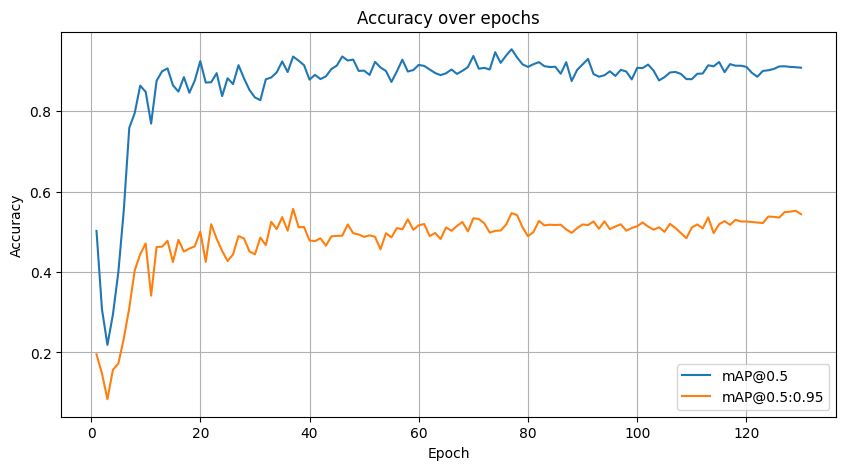

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob


# Find the most recent training log directory
log_dir = max(glob('runs/detect/train*'), key = the_number_in_the_string)\

# Load the training results from CSV file 
results = pd.read_csv(os.path.join(log_dir, 'results.csv'))
results.columns = results.columns.str.strip()  # Remove any leading / trailing whitespace from column names

# Extract epochs and accuracy metrics
epochs = results.index + 1 # Epochs are zero-indexed, so added 1
mAP_0_5 = results['metrics/mAP50(B)']  # Mean Average Precision at IoU = 0.5
mAP_0_5_0_95 = results['metrics/mAP50-95(B)']  # Mean Average Precision at IoU = 0.5:0.95

# Plot the accuracy over epochs
plt.figure(figsize=(10,5))
plt.plot(epochs, mAP_0_5, label = 'mAP@0.5')
plt.plot(epochs, mAP_0_5_0_95, label = 'mAP@0.5:0.95')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Save the trained model
model.save('best_license_plate_model.pt')

In [22]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


def predict_and_plot(path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.

    Parameters:
    path_test_car (str): Path to the test image file.
    """
    # Perform prediction on the test image using the model
    results = model.predict(path_test_car, device='cpu')

    # Load the image using OpenCV
    image = cv2.imread(path_test_car)
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the bounding boxes and labels from the results
    for result in results:
        for box in result.boxes:
            # Get the coordinates of the bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Get the confidence score of the prediction
            confidence = box.conf[0]

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Draw the confidence score near the bounding box
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Plot the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image


image 1/1 /kaggle/input/car-plate-detection/images/Cars425.png: 160x320 1 license_plate, 48.3ms
Speed: 0.7ms preprocess, 48.3ms inference, 8.2ms postprocess per image at shape (1, 3, 160, 320)


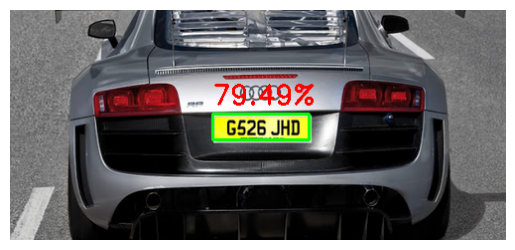

In [23]:
predict_and_plot(test.iloc[0].img_path)


image 1/1 /kaggle/input/car-plate-detection/images/Cars181.png: 320x192 1 license_plate, 47.0ms
Speed: 0.8ms preprocess, 47.0ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 192)


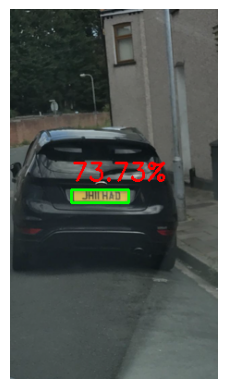

In [24]:
predict_and_plot(test.iloc[2].img_path)


image 1/1 /kaggle/input/car-plate-detection/images/Cars287.png: 288x320 1 license_plate, 52.5ms
Speed: 1.1ms preprocess, 52.5ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 320)


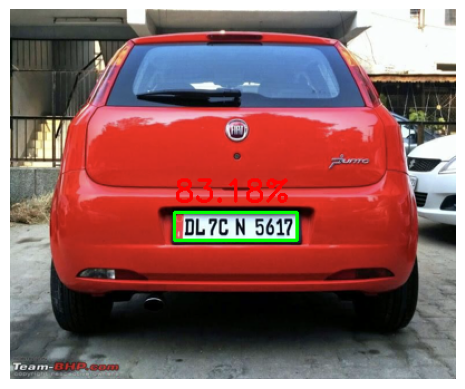

In [25]:
predict_and_plot(test.iloc[20].img_path)

## Implementing Text Extraction

In [26]:
!pip install pytesseract

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [27]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pytesseract
from pytesseract import Output


def predict_and_plot(path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.
    Also performs OCR on the detected bounding boxes to extract text.
    
    Parameters:
    path_test_car (str): Path to the test image file.
    """
    # Perform prediction on the test image using the model
    results = model.predict(path_test_car, device='cpu')

    # Load the image using OpenCV
    image = cv2.imread(path_test_car)
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the bounding boxes and labels from the results
    for result in results:
        for box in result.boxes:
            # Get the coordinates of the bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Get the confidence score of the prediction
            confidence = box.conf[0]

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Draw the confidence score near the bounding box
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            # Crop the bounding box from the image for OCR
            roi = image[y1:y2, x1:x2]

            # Perform OCR on the cropped image
            text = pytesseract.image_to_string(roi, config='--psm 6')
            print(f"Detected text: {text}")

    # Plot the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image


image 1/1 /kaggle/input/car-plate-detection/images/Cars425.png: 160x320 1 license_plate, 38.5ms
Speed: 1.3ms preprocess, 38.5ms inference, 1.1ms postprocess per image at shape (1, 3, 160, 320)
Detected text: G526 JHD



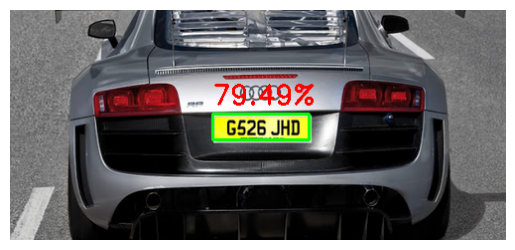

In [28]:
predict_and_plot(test.iloc[0].img_path)


image 1/1 /kaggle/input/car-plate-detection/images/Cars181.png: 320x192 1 license_plate, 39.5ms
Speed: 1.2ms preprocess, 39.5ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 192)
Detected text: | JHUHAD |



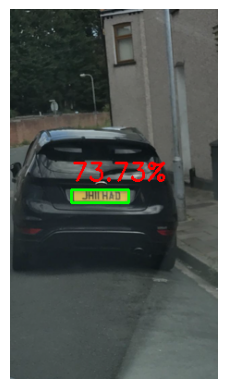

In [29]:
predict_and_plot(test.iloc[2].img_path)

In [1]:
predict_and_plot(test.iloc[40].img_path)

NameError: name 'predict_and_plot' is not defined